<a href="https://colab.research.google.com/github/jjhhyyg/pytorch_tutorial/blob/main/00_pytorch_fundamentals_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Fundamentals

Resource notebook: https://www.learnpytorch.io/00_pytorch_fundamentals  
If you have a question: https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [ ]:
print("Hello, I'm excited to learn PyTorch!")

Hello, I'm excited to learn PyTorch!


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu118


## Introduction to Tensors

### Creating tensors

Pytorch tensors are created using `torch.Tensor()`

https://pytorch.org/docs/stable/tensors.html

In [ ]:
# scalar

scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
# check the scalar's dimension
scalar.ndim

0

In [ ]:
# Get tensor back as Python int
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# MATRIX
MATRIX = torch.tensor([[7,8],
                      [9,10],
                      [11,12],
                      [13,14]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10],
        [11, 12],
        [13, 14]])

In [ ]:
MATRIX.shape

torch.Size([4, 2])

In [ ]:
MATRIX.ndim

2

In [ ]:
MATRIX[1]

tensor([ 9, 10])

In [ ]:
# Tensor
TENSOR = torch.tensor([[[[1,2,3],
                        [2,3,4],
                        [3,4,5]]]])
TENSOR

tensor([[[[1, 2, 3],
          [2, 3, 4],
          [3, 4, 5]]]])

In [ ]:
TENSOR.ndim, TENSOR.shape

(4, torch.Size([1, 1, 3, 3]))

In [ ]:
TENSOR[0]

tensor([[[1, 2, 3],
         [2, 3, 4],
         [3, 4, 5]]])

In [ ]:
TENSOR[0][0]

tensor([[1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])

In [ ]:
TENSOR[0][0][1][1]

tensor(3)

### Random tensors

Why random tensors? -> Random tensors are important because the way many neural networks learn is that they start with tensors full of random nubers and then adjust those random numbers to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers`

https://pytorch.org/docs/stable/generated/torch.rand.html

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.1062, 0.1492, 0.6518, 0.3499],
        [0.7512, 0.6197, 0.0921, 0.9376],
        [0.9678, 0.9330, 0.6447, 0.3130]])

In [ ]:
random_tensor.ndim

2

In [ ]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

**Attention!** In tensor-speak, the tensor would have three dimenstions, one for `color_channels`, `height` and `width`

### Zeros and ones

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
random_tensor * zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
random_tensor * ones

tensor([[0.1062, 0.1492, 0.6518, 0.3499],
        [0.7512, 0.6197, 0.0921, 0.9376],
        [0.9678, 0.9330, 0.6447, 0.3130]])

### Create a range of tensors and tensors-like

In [ ]:
# Use torch.arange()
one_to_ten = torch.arange(0, 10)
one_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch.arange(1,1000,15) # start, end, step

tensor([  1,  16,  31,  46,  61,  76,  91, 106, 121, 136, 151, 166, 181, 196,
        211, 226, 241, 256, 271, 286, 301, 316, 331, 346, 361, 376, 391, 406,
        421, 436, 451, 466, 481, 496, 511, 526, 541, 556, 571, 586, 601, 616,
        631, 646, 661, 676, 691, 706, 721, 736, 751, 766, 781, 796, 811, 826,
        841, 856, 871, 886, 901, 916, 931, 946, 961, 976, 991])

In [ ]:
# Creating tensors like
one_to_ten.shape

torch.Size([10])

In [ ]:
ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ten_ones = torch.ones_like(one_to_ten)
ten_ones

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Tensor Datatypes

https://pytorch.org/docs/stable/tensors.html

**Note:** Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning:

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [ ]:
# Float 32 tensor (single precision)
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # what datatype is the tensor
                               device=None, # run on cpu or gpu
                               requires_grad=False # whether or not to track gradients
                               )
float_32_tensor.dtype

torch.float32

In [ ]:
# Float 16 tensor (half precision)
# float_16_tensor = torch.tensor([3.0, 6.0, 9.0], dtype=torch.float16)
float_16_tensor = float_32_tensor.type(torch.float16)
# float_16_tensor = float_32_tensor.type(torch.half)
float_16_tensor.dtype

torch.float16

In [ ]:
# Float 64 tensor (double precision)
float_64_tensor = torch.tensor([3.0, 6.0, 9.0], dtype=torch.float64)
float_64_tensor.dtype

torch.float64

In [ ]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [ ]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
float_16_tensor * int_32_tensor

tensor([ 9., 36., 81.], dtype=torch.float16)

In [ ]:
long_tensor = int_32_tensor.type(torch.long)
long_tensor

tensor([3, 6, 9])

In [ ]:
float_32_tensor * long_tensor

tensor([ 9., 36., 81.])

In [ ]:
float_16_tensor * long_tensor

tensor([ 9., 36., 81.], dtype=torch.float16)

### Getting information from tensors

1. Tensors not right datatype -> to do get datatype from a tensor, can use `tensor.dtype`
2. Tensors not right shape -> to get shape from a tensor, can use `tensor.shape`
3. Tensors not on the right device -> to get device from a tensor, canuse `tensor.device`

In [ ]:
# Create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.2408, 0.8965, 0.7206, 0.5218],
        [0.2976, 0.5993, 0.9642, 0.3488],
        [0.5332, 0.2672, 0.1621, 0.8245]])

In [ ]:
# Find out details
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device of tensor: {some_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device of tensor: cpu


### Manipulating Tensors (tensor operations)

Tensor operations include:
- Addition
- Subtraction
- Multiplication (element-wise)
- Division
- Matrix multiplication

In [ ]:
# Create a tensor
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
tensor / 10

tensor([0.1000, 0.2000, 0.3000])

In [ ]:
tensor // 10

tensor([0, 0, 0])

In [ ]:
tensor * 10

tensor([10, 20, 30])

In [ ]:
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [ ]:
tensor * tensor

tensor([1, 4, 9])

### Matrix multiplication

Two main ways:

- Element-wise multiplication
- Matrix multiplication (dot product)


https://pytorch.org/docs/stable/generated/torch.matmul.html

Two main rules performing matrix multiplication needs to satisfy:
1. The **inner dimension** must match
2. The resulting matrix has the shape of the **outer dimensions**

In [ ]:
tensor @ tensor.T

<ipython-input-49-eab2460029b1>:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3614.)
  tensor @ tensor.T


tensor(14)

In [ ]:
torch.matmul(tensor, tensor.T)

tensor(14)

### One of the most common errors in deep learning: shape errors

In [ ]:
torch.rand(3,4) @ torch.rand(4,3)

tensor([[0.7618, 1.2057, 1.0439],
        [0.7908, 1.3459, 1.1674],
        [0.9093, 1.1516, 0.5953]])

In [ ]:
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])
tensor_B = torch.tensor([[7,10],
                         [8,11],
                         [9,12]])

tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

A **transpose** switches the axes or dimensions of a given tensor

In [ ]:
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

## Finding the min, max, mean, sum, etc (tensor aggregation)

In [ ]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# Find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# Find the mean - note: the torch.mean() function requires a tensor of float32 dtype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [ ]:
# Find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

## Finding the positional min and max

In [ ]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
# Find the position(index) in tensor that has the minimum value with argmin()
x.argmin()

tensor(0)

In [ ]:
# Find the position(index) in tensor that has the maximum value with argmax()
x.argmax()

tensor(9)

## Reshaping, stacking, squeezing and unsqueezing tensors

- [Reshaping](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch-reshape) - reshapes an input tensor to a defined shape
- [View](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) - Return a view of an input tensor of certain shape but **keep the same memory** as the original tensor
- [Stacking](https://pytorch.org/docs/stable/generated/torch.stack.html) - combine multiple tensors on top of each other ([vstack](https://pytorch.org/docs/stable/generated/torch.vstack.html)) or side by side ([hstack](https://pytorch.org/docs/stable/generated/torch.hstack.html))
- [Squeeze](https://pytorch.org/docs/stable/generated/torch.squeeze.html) - removes all `1` dimensions from a tensor
- [Unsqueeze](https://pytorch.org/docs/stable/generated/torch.unsqueeze.html) - add a `1` dimension to a tensor
- [Permute](https://pytorch.org/docs/stable/generated/torch.permute.html) - return a view of the input with dimensions permuted (swapped) in a certain way

In [ ]:
# Create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape, x.dtype

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]), torch.float32)

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1, 9)
x_reshaped

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# Change the view
z = x.view(1, 9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Changing z changes x, too
z[0][2]=11
x

tensor([ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.])

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x_reshaped[0], x, x], dim=0)
x_stacked

tensor([[ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.]])

In [ ]:
x_stacked = torch.stack([x, x, x_reshaped[0], x, x], dim=1)
x_stacked

tensor([[ 1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.],
        [11., 11., 11., 11., 11.],
        [ 4.,  4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.,  9.]])

In [ ]:
x_stacked = torch.vstack([x, x, x_reshaped[0], x, x])
x_stacked

tensor([[ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.]])

In [ ]:
x_stacked = torch.hstack([x, x, x_reshaped[0], x, x])
x_stacked

tensor([ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.,  1.,  2., 11.,  4.,  5.,
         6.,  7.,  8.,  9.,  1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.,  1.,
         2., 11.,  4.,  5.,  6.,  7.,  8.,  9.,  1.,  2., 11.,  4.,  5.,  6.,
         7.,  8.,  9.])

In [ ]:
# squeeze
x_unsqueezed = x.view(1, 9, 1, 1)
x_unsqueezed, x_unsqueezed.shape

(tensor([[[[ 1.]],
 
          [[ 2.]],
 
          [[11.]],
 
          [[ 4.]],
 
          [[ 5.]],
 
          [[ 6.]],
 
          [[ 7.]],
 
          [[ 8.]],
 
          [[ 9.]]]]),
 torch.Size([1, 9, 1, 1]))

In [ ]:
x_unsqueezed.squeeze(), x_unsqueezed.squeeze().shape

(tensor([ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.]), torch.Size([9]))

In [ ]:
# unsqueeze
x_unsqueezed.squeeze().unsqueeze(dim=0), x_unsqueezed.squeeze().unsqueeze(dim=0).shape

(tensor([[ 1.,  2., 11.,  4.,  5.,  6.,  7.,  8.,  9.]]), torch.Size([1, 9]))

In [ ]:
x_unsqueezed.squeeze().unsqueeze(dim=-1), x_unsqueezed.squeeze().unsqueeze(dim=-1).shape

(tensor([[ 1.],
         [ 2.],
         [11.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.]]),
 torch.Size([9, 1]))

In [ ]:
x_unsqueezed.squeeze().unsqueeze(dim=1), x_unsqueezed.squeeze().unsqueeze(dim=1).shape

(tensor([[ 1.],
         [ 2.],
         [11.],
         [ 4.],
         [ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.]]),
 torch.Size([9, 1]))

In [ ]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x = torch.rand(2, 3, 5)
x.size()

torch.Size([2, 3, 5])

In [ ]:
x

tensor([[[0.1841, 0.7667, 0.5793, 0.2485, 0.3315],
         [0.6349, 0.9965, 0.6272, 0.4011, 0.7414],
         [0.1088, 0.1236, 0.4770, 0.2668, 0.5366]],

        [[0.1446, 0.6630, 0.5893, 0.5350, 0.8980],
         [0.9105, 0.9893, 0.5924, 0.2782, 0.2997],
         [0.6199, 0.4920, 0.9874, 0.0290, 0.5240]]])

In [ ]:
torch.permute(x, (2,0,1)).size()

torch.Size([5, 2, 3])

In [ ]:
fake_img = torch.randn(224, 224, 3)
fake_img_permuted = fake_img.permute(2,0,1)
fake_img_permuted.shape

torch.Size([3, 224, 224])

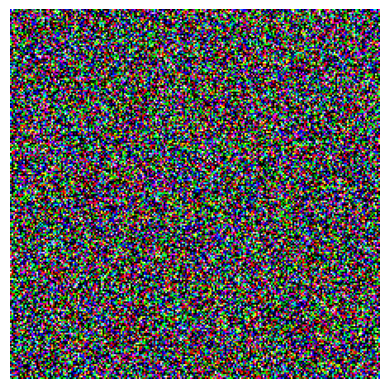

In [ ]:
import matplotlib.pyplot as plt

image_data = fake_img.numpy()
plt.imshow(image_data)
plt.axis('off')
plt.show()

In [ ]:
# Change permuted tensor also change the original one

fake_img[0][0][0] = 3
fake_img_permuted[0][0][0]

tensor(3.)

## Indexing (selecting data from tensors)

Indexing with PyTorch is similar to indexing with numpy.

In [ ]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
x[0][0], x[0][1], x[0][2]

(tensor([1, 2, 3]), tensor([4, 5, 6]), tensor([7, 8, 9]))

In [ ]:
x[0][0][0], x[0][1][1]

(tensor(1), tensor(5))

In [ ]:
x[0, :, 1]

tensor([2, 5, 8])

In [ ]:
x[:, 0:2, 1:3]

tensor([[[2, 3],
         [5, 6]]])

In [ ]:
x[:, 1, 1:3]

tensor([[5, 6]])

In [ ]:
x[0, :, 0]

tensor([1, 4, 7])

## PyTorch tensors & NumPy

- `torch.from_numpy(ndarray)`
- `torch.Tensor.numpy()`

In [ ]:
import torch
import numpy as np

Note: the default data type of a tensor **from a ndarry** is **torch.float64**

In [ ]:
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Note: changing the array self **doesn't change** the tensor! (But **before asigning array to another variable**, changing the element in the array **changes** the tensor)

In [ ]:
array[0] = 3
array, tensor

(array([3., 2., 3., 4., 5., 6., 7.]),
 tensor([3., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
array = array + 1
array, tensor

(array([4., 3., 4., 5., 6., 7., 8.]),
 tensor([3., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Note: the default data type of a numpy from a tensor is float32

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
tensor[0] = 4
tensor, numpy_tensor

(tensor([4., 3., 3., 3., 3., 3., 3.]),
 array([5., 2., 2., 2., 2., 2., 2.], dtype=float32))

There's a tricky situation I've just found:

- `tensor += 1` doesn't cut the bound off between tensor and numpy_tensor
- `tensor = tensor + 1` make tensor and numpy_tensor two independent variable

In [ ]:
tensor = tensor + 1
tensor, numpy_tensor

(tensor([5., 4., 4., 4., 4., 4., 4.]),
 array([5., 2., 2., 2., 2., 2., 2.], dtype=float32))

## Reproducibility (trying to take random out of random)

`start with random numbers -> tensor operations -> update random numbers to try and
make them better representations of the data -> again -> again -> again ...`

To reduce the randomness in neural networks and PyTorch comes the concept of a
**random seed**.

Essentially what the random seed does is "flavour" the randomness.

In [ ]:
import torch

random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

random_tensor_A == random_tensor_B

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])